In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
links = pd.read_csv("links.csv")
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
tags = pd.read_csv("tags.csv")

In [5]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


#### The shape of "links.csv"

In [11]:
links.shape

(9742, 3)

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### The shape of "movies.csv"

In [10]:
movies.shape

(9742, 3)

In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### The shape of "ratings.csv"

In [12]:
ratings.shape

(100836, 4)

### Unique "userId" are available in "ratings.csv" are 610

In [18]:
unique_userid = ratings["userId"].nunique()

print(unique_userid)

610


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [13]:
tags.shape

(3683, 4)

In [41]:
movies_links = pd.merge(movies, links, on='movieId')

merged_data = pd.merge(ratings, movies_links, on='movieId')

df = pd.merge(merged_data, tags, on='movieId', how='left')  
df

,userId_x,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,userId_y,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,1.525286e+09
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09
...,...,...,...,...,...,...,...,...,...,...,...
285757,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,118745,30948.0,NaN,NaN,NaN
285758,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,66806,90351.0,NaN,NaN,NaN
285759,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,798722,70193.0,NaN,NaN,NaN
285760,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,1540011,351211.0,NaN,NaN,NaN


In [49]:
movie_ratings_count = df['movieId'].value_counts()

max_ratings_movie_id = movie_ratings_count.idxmax()

max_ratings_movie_title = df[df['movieId'] == max_ratings_movie_id]['title'].iloc[2]

print("The movie with the maximum number of user ratings is:", max_ratings_movie_title)

The movie with the maximum number of user ratings is: Pulp Fiction (1994)


In [52]:
matrix_tags = df[df['title'] == 'Matrix, The (1999)']

print("Tags for 'Matrix, The (1999)':")
print(matrix_tags['tag'].unique())

Tags for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [53]:
terminator_2_ratings = df[df['title'] == 'Terminator 2: Judgment Day (1991)']['rating']

average_rating = terminator_2_ratings.mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


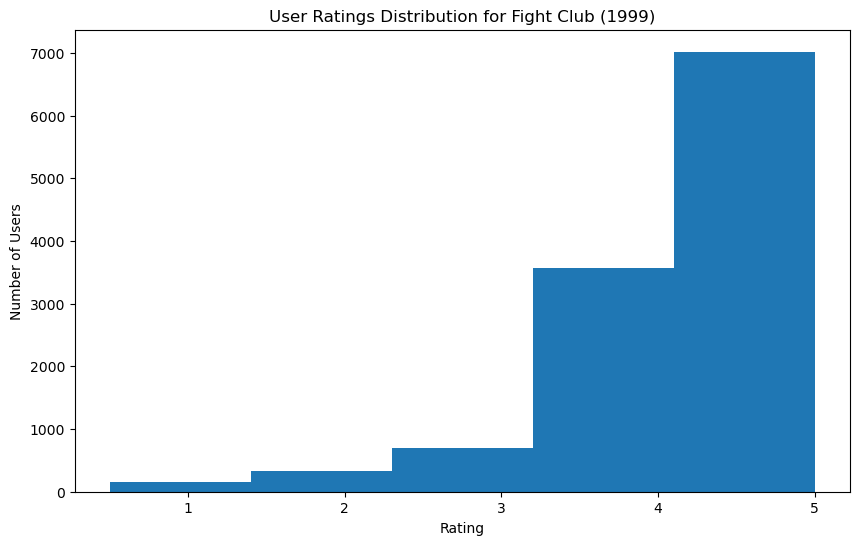

In [90]:
fight_club_ratings = df[df['title'] == 'Fight Club (1999)']['rating']

plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=5) 
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

In [61]:
movie_ratings_summary = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

movie_ratings_summary.columns = ['movieId', 'num_ratings', 'avg_rating']

(movie_ratings_summary.head())

,movieId,num_ratings,avg_rating
0,1,645,3.920930
1,2,440,3.431818
2,3,104,3.259615
3,4,7,2.357143
4,5,98,3.071429


In [72]:
movie_ratings_summary = df.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
movie_ratings_summary.columns = ['movieId', 'num_ratings', 'avg_rating']

df1 = pd.merge(df, movie_ratings_summary, on='movieId', how='inner')

df1

,userId_x,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,userId_y,tag,timestamp_y,num_ratings,avg_rating
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09,645,3.92093
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09,645,3.92093
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,1.525286e+09,645,3.92093
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09,645,3.92093
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09,645,3.92093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285757,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,118745,30948.0,NaN,NaN,NaN,1,2.50000
285758,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,66806,90351.0,NaN,NaN,NaN,1,4.50000
285759,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,798722,70193.0,NaN,NaN,NaN,1,3.00000
285760,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,1540011,351211.0,NaN,NaN,NaN,1,3.50000


In [73]:

df2 = df1[df1['num_ratings'] > 50]

df2

,userId_x,movieId,rating,timestamp_x,title,genres,imdbId,tmdbId,userId_y,tag,timestamp_y,num_ratings,avg_rating
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09,645,3.92093
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09,645,3.92093
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,567.0,fun,1.525286e+09,645,3.92093
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,336.0,pixar,1.139046e+09,645,3.92093
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,474.0,pixar,1.137207e+09,645,3.92093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280108,606,3676,3.5,1171759142,Eraserhead (1977),Drama|Horror,74486,985.0,567.0,Insane,1.525283e+09,170,3.75000
280109,606,3676,3.5,1171759142,Eraserhead (1977),Drama|Horror,74486,985.0,567.0,paranoid,1.525283e+09,170,3.75000
280110,606,3676,3.5,1171759142,Eraserhead (1977),Drama|Horror,74486,985.0,567.0,strange,1.525283e+09,170,3.75000
280111,606,3676,3.5,1171759142,Eraserhead (1977),Drama|Horror,74486,985.0,567.0,surreal,1.525283e+09,170,3.75000


In [82]:
most_popular_movie = df2.loc[df2['avg_rating'].idxmax()]

print(most_popular_movie[['title', 'avg_rating']])

title         Shawshank Redemption, The (1994)
avg_rating                            4.429022
Name: 119433, dtype: object


In [86]:
top5_popular_movies = df2.sort_values(by='num_ratings', ascending=False).head(5)

print(top5_popular_movies[['title', 'num_ratings']])

                     title  num_ratings
60493  Pulp Fiction (1994)        55567
45600  Pulp Fiction (1994)        55567
45586  Pulp Fiction (1994)        55567
45587  Pulp Fiction (1994)        55567
45588  Pulp Fiction (1994)        55567


In [94]:
highest_imdb_movie = df2.loc[df2['imdbId'].idxmax()]

print(highest_imdb_movie[['movieId', 'title', 'imdbId', 'tmdbId', 'num_ratings', 'avg_rating']])

movieId                               168248
title          John Wick: Chapter Two (2017)
imdbId                               4425200
tmdbId                              324552.0
num_ratings                               56
avg_rating                          4.142857
Name: 245668, dtype: object


In [96]:
sci_fi_movies = df2[df2['genres'].str.contains('Sci-Fi')]

highest_imdb_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdbId'].idxmax()]

print(highest_imdb_sci_fi_movie[['movieId', 'title', 'imdbId', 'tmdbId', 'num_ratings', 'avg_rating']])


movieId                                        122912
title          Avengers: Infinity War - Part I (2018)
imdbId                                        4154756
tmdbId                                       299536.0
num_ratings                                       195
avg_rating                                        4.0
Name: 250724, dtype: object
